In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
quora_questions=pd.read_csv("quora_dataset_modified_v2.csv")

In [6]:
quora_questions.head()

,Unnamed: 0,Unnamed: 0.1,id,qid1,qid2,question1,question2,is_duplicate,Correlation
0,0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0,0.978190
1,1,1,1,3,4,stori kohinoor koh noor diamond,happen indian govern stole kohinoor koh noor d...,0,0.766073
2,2,2,2,5,6,can increa speed internet connect use vpn,can internet speed increa hack dns,0,0.473188
3,3,3,3,7,8,mental lone can solv,find remaind math 23 24 math divid 24 23,0,0.000000
4,4,4,4,9,10,one dissolv water quik sugar salt methan carbo...,fish surviv salt water,0,0.246763


In [10]:
quora_questions[0:20]

,Unnamed: 0,Unnamed: 0.1,id,qid1,qid2,question1,question2,is_duplicate,Correlation
0,0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0,0.978190
1,1,1,1,3,4,stori kohinoor koh noor diamond,happen indian govern stole kohinoor koh noor d...,0,0.766073
2,2,2,2,5,6,can increa speed internet connect use vpn,can internet speed increa hack dns,0,0.473188
3,3,3,3,7,8,mental lone can solv,find remaind math 23 24 math divid 24 23,0,0.000000
4,4,4,4,9,10,one dissolv water quik sugar salt methan carbo...,fish surviv salt water,0,0.246763
5,5,5,5,11,12,astrolog capricorn sun cap moon cap rise say,m tripl capricorn sun moon ascend capricorn say,1,0.487290
6,6,6,6,13,14,buy tiago,keep childern activ far phone video game,0,0.000000
7,7,7,7,15,16,can good geologist,great geologist,1,0.802804
8,8,8,8,17,18,use instead,use instead,0,1.000000
9,9,9,9,19,20,motorola compani can hack charter motorolla dc...,hack motorola dcx3400 free internet,0,0.638313


In [2]:
mean_corr=quora_questions['Correlation'][quora_questions['is_duplicate']==1].mean()
mean_corr

0.71883927435662098

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(quora_questions, test_size = 0.3)


In [4]:
print ("Training set size : ",len(train))
print ("Testing set size : ",len(test))


Training set size :  283003
Testing set size :  121287


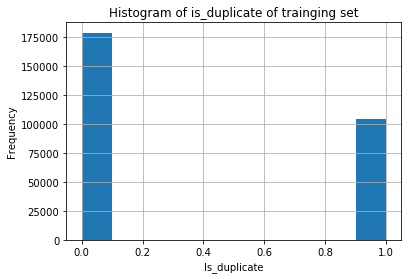

In [5]:
train['is_duplicate'].hist()
plt.title('Histogram of is_duplicate of trainging set')
plt.xlabel('Is_duplicate')
plt.ylabel('Frequency')

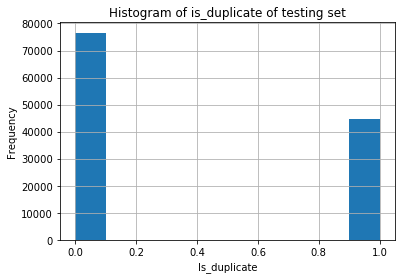

In [6]:
test['is_duplicate'].hist()
plt.title('Histogram of is_duplicate of testing set')
plt.xlabel('Is_duplicate')
plt.ylabel('Frequency')

In [7]:
train.groupby('is_duplicate').mean()

,Unnamed: 0,Unnamed: 0.1,id,qid1,qid2,Correlation
is_duplicate,,,,,,
0,202642,202642,202642,246857,252644,0.484276
1,201039,201039,201039,166128,166406,0.718421


In [8]:
test.groupby('is_duplicate').mean()

,Unnamed: 0,Unnamed: 0.1,id,qid1,qid2,Correlation
is_duplicate,,,,,,
0,203595,203595,203595,247540,253076,0.486551
1,200255,200255,200255,166693,167022,0.719816


In [9]:
# create dataframes with an intercept column 
y, X = dmatrices('is_duplicate ~ Correlation',quora_questions, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'Correlation'], dtype='object')


In [10]:
import statsmodels.api as sm
# flatten y into a 1-D array
y = np.ravel(y)

In [11]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y) #here the accuracy is 66% which is decent 

0.66982858838952242

In [12]:
# what percentage had duplicate?
y.mean() # Only 36% of quora questions are duplicate which means we can get accuracy of 64% by always predecting No.
         # so we are doing better but not much

0.36919785302629299

In [13]:
# evaluate the model by splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[ 0.  0.  0. ...,  0.  0.  0.]


In [15]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[ 0.75136666  0.24863334]
 [ 0.57075312  0.42924688]
 [ 0.71070006  0.28929994]
 ..., 
 [ 0.54830901  0.45169099]
 [ 0.57838803  0.42161197]
 [ 0.52145455  0.47854545]]


In [16]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
# accuracy is still 66% which is same when as we experienced when training and predicting on the same data

0.668934016012
0.732511492831


In [17]:
# Lets see the confusion matrix and a classification report with other metrics.
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[60554 15806]
 [24348 20579]]
             precision    recall  f1-score   support

        0.0       0.71      0.79      0.75     76360
        1.0       0.57      0.46      0.51     44927

avg / total       0.66      0.67      0.66    121287



In [18]:
# Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

#accuracy is still  66%

[ 0.66829087  0.67187732  0.66608954  0.67110243  0.66707067  0.66934626
  0.67043459  0.67198476  0.67092114  0.67131691]
0.669843448923


In [19]:

model.predict_proba(np.array([1, 0.8]))

C:\Users\saura\Miniconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.46590123,  0.53409877]])

In [20]:
new_question1="android phone best batteri life"
new_question2="android phone good batteri life"

document1=quora_questions['question1']
document1=document1.fillna('0')
document1[404290]=new_question1

document2=quora_questions['question2']
document2=document2.fillna('0')
document2[404290]=new_question2

document_all=document1[:]
document_all=document_all.append(document2)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_all = tfidf_vectorizer.fit_transform(document_all)
print (tfidf_matrix_all.shape)


# Predicting duplicity
from sklearn.metrics.pairwise import cosine_similarity
# question_no=8
s=tfidf_matrix_all.shape
a=cosine_similarity(tfidf_matrix_all[404290], tfidf_matrix_all[s[0]-1])
print ("Original Questions : ",document1[404290])
print ("Alongside Question : ",document2[404290])
print ("Correlation value with alongside question :  ",a[0][0])
temp=model.predict_proba(np.array([a[0][0],1]))
# print (temp)
print ("There is {}% chance that the questions are duplicate".format(temp[0][1]*100))
# len(document1)

(808582, 64063)
Original Questions :  android phone best batteri life
Alongside Question :  android phone good batteri life
Correlation value with alongside question :   0.905818128243
There is 72.61572272748465% chance that the questions are duplicate


C:\Users\saura\Miniconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
